In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

# Loading Dataset

In [9]:
data=pd.read_csv(r"C:\Users\abhis\Desktop\DSA Dataset\titanic_dataset.csv")

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Making PassengerId as the indexx column

In [11]:
data=pd.read_csv(r"C:\Users\abhis\Desktop\DSA Dataset\titanic_dataset.csv",index_col=("PassengerId"))

In [12]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic details of the Dataset

In [13]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Filling Missing Values

In [14]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [15]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

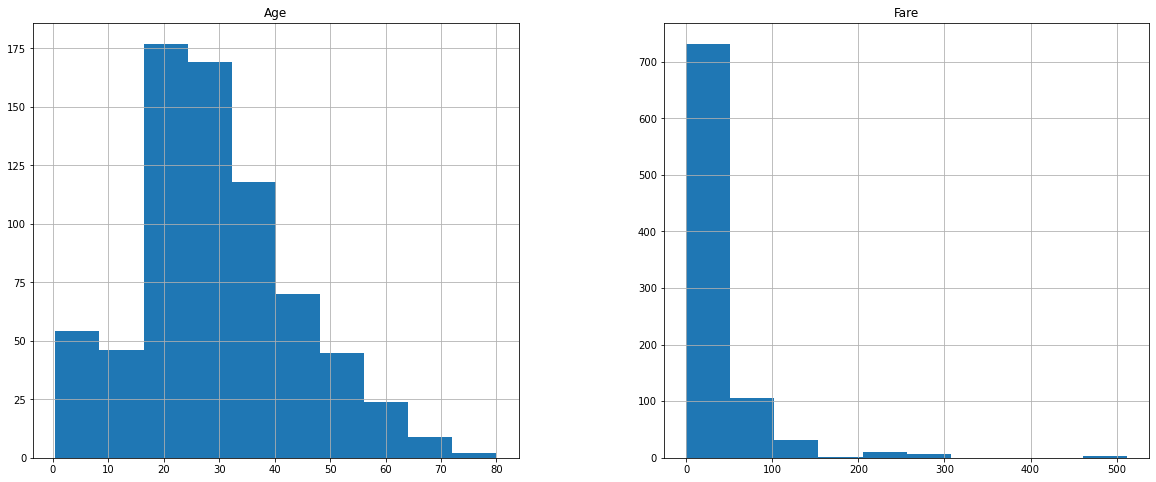

In [16]:
fragraph=data.select_dtypes(include=["float"])
fragraph.hist(figsize=(20,8))
plt.show

In [17]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
data["Age"]=data["Age"].fillna(data['Age'].median())
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [61]:
mode = st.mode(data['Embarked'])
mode
data["Age"]=data["Age"].fillna(mode)
data['Cabin']=data['Cabin'].fillna('Unknown')
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Handling Outliers

Text(0.5, 1.0, 'Boxplot of Fare')

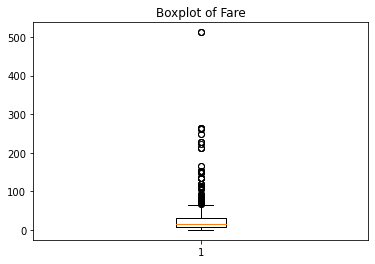

In [21]:
plt.boxplot(data["Fare"])
plt.title("Boxplot of Fare")

In [22]:
Q1=np.percentile(data["Fare"],25,interpolation="midpoint")
Q2=np.percentile(data["Fare"],50,interpolation="midpoint")
Q3=np.percentile(data["Fare"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [23]:
data["Fare"].median()

14.4542

In [24]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-26.724
65.6344


In [25]:
outlier=[]
for x in data["Fare"]:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [26]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [27]:
data1=data["Fare"]>up_lim
ind1=data.loc[data1].index
ind1

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [28]:
data.drop(ind1,inplace=True)

In [29]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q


Text(0.5, 1.0, 'Boxplot of Age')

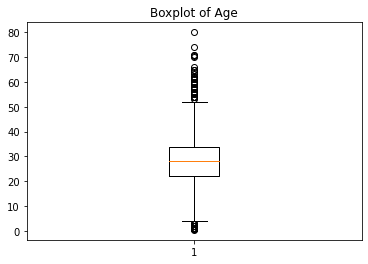

In [30]:
plt.boxplot(data["Age"])
plt.title("Boxplot of Age")

In [31]:
Q1=np.percentile(data["Age"],25,interpolation="midpoint")
Q2=np.percentile(data["Age"],50,interpolation="midpoint")
Q3=np.percentile(data["Age"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
34.0


In [32]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

4.0
52.0


In [33]:
outlier=[]
for x in data["Age"]:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier        

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

In [72]:
ind2=data['Age'][(data['Age']>up_lim)|(data['Age']<low_lim)].index
data.drop(ind2,inplace=True)

Text(0.5, 1.0, 'Boxplot of Age')

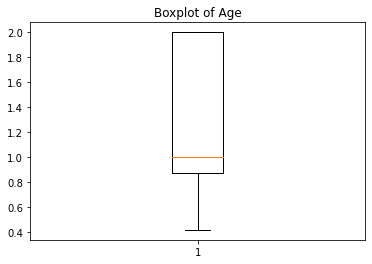

In [73]:
plt.boxplot(data["Age"])
plt.title("Boxplot of Age")

Text(0.5, 1.0, 'Boxplot of SibSp')

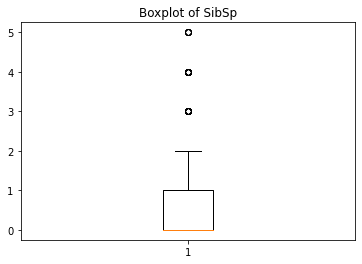

In [64]:
plt.boxplot(data["SibSp"])
plt.title("Boxplot of SibSp")

In [67]:
Q1=np.percentile(data["SibSp"],25,interpolation="midpoint")
Q2=np.percentile(data["SibSp"],50,interpolation="midpoint")
Q3=np.percentile(data["SibSp"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.0
0.0
1.0
-1.5
2.5


In [68]:
outlier=[]
for x in data["SibSp"]:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier        

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [76]:
ind3=data['SibSp'][(data['SibSp']>up_lim)|(data['SibSp']<low_lim)].index

In [77]:
data.drop(ind3,inplace=True)

Text(0.5, 1.0, 'Boxplot of SibSp')

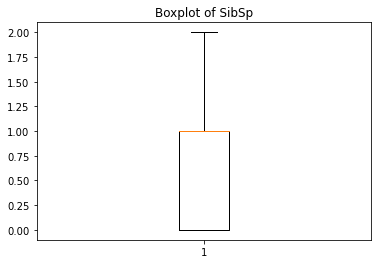

In [78]:
plt.boxplot(data["SibSp"])
plt.title("Boxplot of SibSp")

# MinMax Scaling

In [79]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [80]:
y=data['Survived']
x=data.drop('Survived',axis=1)

In [90]:
from sklearn.preprocessing import MinMaxScaler
min = MinMaxScaler(feature_range=(0,1))
x = min.fit_transform(x)
x

ValueError: could not convert string to float: 'Caldwell, Master. Alden Gates'